# Housing Prices: Model Selection

## 1. Preprocessing Pipeline

In [569]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config

In [570]:
# reading
original_housing_df = pd.read_csv('housing-classification_competition.csv')
competition_test_df = pd.read_csv('test-housing-classification.csv')
competition_test_data = competition_test_df.pop("Id")
data = original_housing_df.copy()
data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [571]:
# X and y creation
X = data.drop(columns=["Id","PoolQC","MiscFeature","Fence",
                       "Condition2", "Alley", "Exterior2nd", 
                       "BsmtFinType2","SaleCondition"])#,"SaleType"])
y = X.pop("Expensive")

In [572]:
# Feature Engineering
# No feature Engineering is needed
#X.loc[:, "Cabin"] = X.Cabin.str[0]

In [573]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

<Axes: >

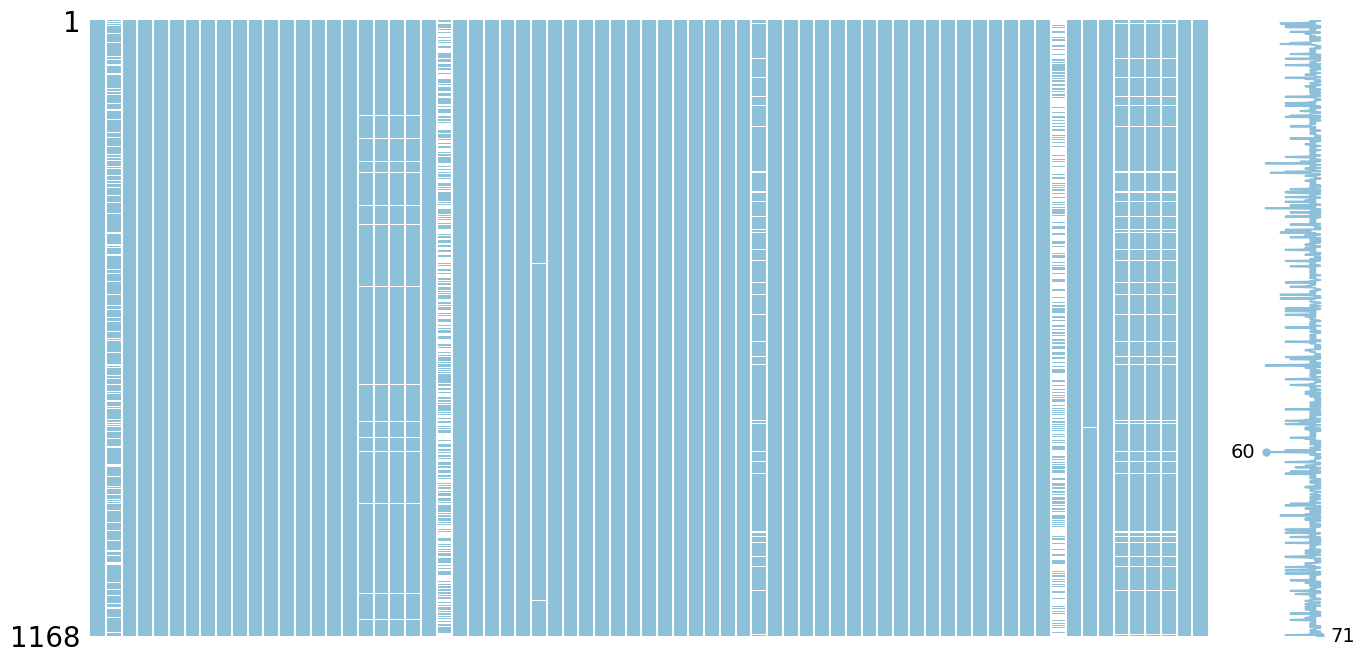

In [574]:
#!pip install missingno
import missingno as msno
msno.matrix(X_train, color=(0.55, 0.75, 0.85), figsize=(16, 8))

In [575]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 772 to 1391
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1168 non-null   int64  
 1   LotFrontage    966 non-null    float64
 2   TotalBsmtSF    1168 non-null   int64  
 3   BedroomAbvGr   1168 non-null   int64  
 4   Fireplaces     1168 non-null   int64  
 5   PoolArea       1168 non-null   int64  
 6   GarageCars     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   ScreenPorch    1168 non-null   int64  
 9   MSZoning       1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Heating        1168 non-null   object 
 12  Street         1168 non-null   object 
 13  CentralAir     1168 non-null   object 
 14  Foundation     1168 non-null   object 
 15  ExterQual      1168 non-null   object 
 16  ExterCond      1168 non-null   object 
 17  BsmtQual       1141 non-null   object 
 18  BsmtCond   

In [576]:
# Set the config so that we can view our preprocessor, and to transform output from numpy arrays to pandas dataframes
set_config(display="diagram")
set_config(transform_output="pandas")

# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

In [577]:
X_num.head(2)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSSubClass,...,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold
0,8450,65.0,856,3,0,0,2,0,0,60,...,1,8,2003.0,548,61,0,0,0,2,2008
1,9600,80.0,1262,3,1,0,2,298,0,20,...,1,6,1976.0,460,0,0,0,0,5,2007


In [578]:
X_cat.head(2)

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,MasVnrType,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType
0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,BrkFace,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD
1,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,NaN,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD


In [579]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

In [580]:
# defining ordinal & onehot columns
ordinal_cols = ['Street','CentralAir','Foundation','ExterQual', 
                'ExterCond','BsmtQual','BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'ExterQual', 'ExterCond', 
                'KitchenQual','FireplaceQu', 'LotShape', 'LandContour',
                'Utilities','LotConfig', 'LandSlope', 'BldgType',
                'HouseStyle','RoofStyle','RoofMatl' , 
                'MasVnrType', 'HeatingQC', 'Electrical',
                #'PoolQC'
                'Functional', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive']
onehot_cols = ['Heating', 'MSZoning','Condition1',
               'Neighborhood', 'Exterior1st', 'GarageType','SaleType']

In [581]:
street_cats = ['N_A', 'Grvl', 'Pave']
central_air_cats = ['N_A', 'N', 'Y']
foundation_cats = ['N_A', 'Slab', 'BrkTil', 'CBlock', 'Wood', 'Stone', 'PConc']
BsmtQual_cat = ['N_A', 'NA', 'Po', 'Fa','TA','Gd',  'Ex']
BsmtCond_cat = ['N_A', 'NA', 'Po', 'Fa','TA','Gd',  'Ex']
BsmtExposure_cat = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_cat = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
#BsmtFinType2_cat = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ExterQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
KitchenQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu_cat = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_cat = ['N_A','NA','No','Mn','Av','Gd']
#Alley_cat = ['N_A','NA','Pave','Grvl']
LotShape_cat = ['N_A','IR3','IR2','IR1','Reg']
LandContour_cat = ['N_A','Low','HLS','Bnk','Lvl']
Utilities_cat = ['N_A','ELO','NoSeWa','NoSewr','AllPub']
LotConfig_cat = ['N_A','Inside','Corner','CulDSac','FR2','FR3']
LandSlope_cat = ['N_A','Sev','Mod','Gtl']
BldgType_cat = ['N_A','Twnhs','TwnhsE','Duplex','2fmCon','1Fam']
HouseStyle_cat = ['N_A','1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl']
RoofStyle_cat = ['N_A', 'Flat', 'Shed' , 'Gable' , 'Hip' , 'Gambrel' , 'Mansard' ]
RoofMatl_cat = ['N_A', 'Roll', 'Tar&Grv' , 'CompShg' , 'WdShngl' , 'WdShake' , 'Membran', 'Metal','ClyTile' ]
MasVnrType_cat = ['N_A','None','CBlock','BrkCmn', 'BrkFace', 'Stone']
HeatingQC_cat =  ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
Electrical_cat = ['N_A', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
Functional_cat = ['N_A', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1','Typ']
GarageFinish_cat = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
GarageQual_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageCond_cat = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
PavedDrive_cat = ['N_A', 'N', 'P', 'Y']
PoolQC_cat = ['N_A', 'NA', 'Fa', 'TA', 'Gd', 'Ex']

In [582]:
# defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(categories=[street_cats, central_air_cats,
                                                   foundation_cats, ExterQual_cat,
                                                   ExterCond_cat, BsmtQual_cat,
                                                   BsmtCond_cat, BsmtExposure_cat,
                                                   BsmtFinType1_cat,ExterQual_cat, 
                                                   ExterCond_cat, KitchenQual_cat, 
                                                   FireplaceQu_cat, 
                                                   LotShape_cat,
                                                   LandContour_cat, Utilities_cat, 
                                                   LotConfig_cat, LandSlope_cat, 
                                                   BldgType_cat, HouseStyle_cat,
                                                   RoofStyle_cat, RoofMatl_cat, 
                                                   MasVnrType_cat, 
                                                   HeatingQC_cat,
                                                   Electrical_cat, Functional_cat,
                                                  GarageFinish_cat, GarageQual_cat,
                                                   #PoolQC_cat,
                                                   GarageCond_cat, PavedDrive_cat]), ordinal_cols),
        ("cat_onehot", OneHotEncoder(handle_unknown="ignore", 
                                     sparse_output=False), onehot_cols),
    ]
)


In [583]:
#categorical pipeline = "N_A" imputer + categorical encoder
categoric_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder
                                )

In [584]:
categoric_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('columntransformer',
                 ColumnTransformer(transformers=[('cat_ordinal',
                                                  OrdinalEncoder(categories=[['N_A',
                                                                              'Grvl',
                                                                              'Pave'],
                                                                             ['N_A',
                                                                              'N',
                                                                              'Y'],
                                                                             ['N_A',
                                                                              'Slab',
                                                                              'BrkTil',
                                                                              'CBlock',
                                                                              'Wood',
                                                                              'Stone',
                                                                              'PConc'],
                                                                             ['N_A',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['N_A',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['N_A',
                                                                              'N...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'MasVnrType', 'HeatingQC',
                                                   'Electrical', 'Functional',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond',
                                                   'PavedDrive']),
                                                 ('cat_onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Heating', 'MSZoning',
                                                   'Condition1', 'Neighborhood',
                                                   'Exterior1st', 'GarageType',
                                                   'SaleType'])]))])

In [585]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

## 2. Modelling (Decision Tree)

In [586]:
full_pipeline_dtree = make_pipeline(preprocessor,
                              DecisionTreeClassifier(random_state=31416))

In [587]:
full_pipeline_dtree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1'...
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'HeatingQC', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=31416))])

In [588]:
from sklearn.model_selection import GridSearchCV


param_grid = {
     # "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
      "decisiontreeclassifier__max_depth": range(2, 8),
       "decisiontreeclassifier__min_samples_leaf": range(2, 5),
        "decisiontreeclassifier__min_samples_split": range(2, 5),
       # "decisiontreeclassifier__criterion":["gini", "entropy"]
}

search = GridSearchCV(full_pipeline_dtree,
                      param_grid,
                      cv=10,
                      verbose=1)

search.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodA...
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=31416))]),
             param_grid={'decisiontreeclassifier__max_depth': range(2, 8),
                         'decisiontreeclassifier__min_samples_leaf': range(2, 5),
                         'decisiontreeclassifier__min_samples_split': range(2, 5)},
             verbose=1)

In [589]:
search.best_params_

{'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 2}

In [590]:
# Create a dictionary to store the best scores from the different models
scores = {"dtree" : search.best_score_}

scores

{'dtree': 0.9306734453286177}

## 3. Error analysis

In [591]:
# test accuracy
accuracy_score(search.predict(X_test), y_test)

0.9315068493150684

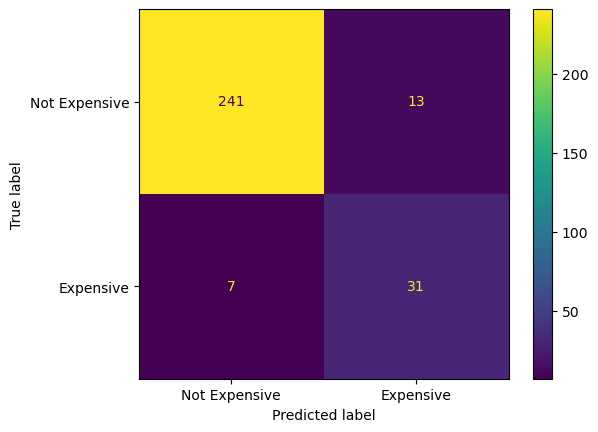

In [592]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive','Expensive']);

### KNN

Read the Platform lesson on KNN: https://learn.wbscodingschool.com/topic/%f0%9f%93%9d-iteration-5-k-nearest-neighbors/

> **Tip**: Check the SciKit-Learn docummentation to find how to import the KNN model for this task and how to tune its hyperparameters (the names and possible values of the parameters).


In [593]:
import warnings


# Filter out the specific warning by specifying its category
warnings.filterwarnings("ignore", category=UserWarning, message="Scoring failed.")
warnings.filterwarnings("ignore", category=UserWarning, message="One or more of the test scores are non-finite")


from sklearn.neighbors import KNeighborsClassifier
full_knn_pipeline = make_pipeline(preprocessor,
                              KNeighborsClassifier())

In [594]:
full_knn_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1'...
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'HeatingQC', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [595]:
param_grid_knn = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50, 5),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

search_knn = GridSearchCV(full_knn_pipeline,
                      param_grid_knn,
                      cv=10,
                      verbose=1)

search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodA...
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'kneighborsclassifier__n_neighbors': range(2, 50, 5),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=1)

In [596]:
search_knn.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__n_neighbors': 7,
 'kneighborsclassifier__weights': 'distance'}

In [597]:
scores["knn"] = search_knn.best_score_

scores

{'dtree': 0.9306734453286177, 'knn': 0.9126510462717359}

### Adding a scaler

In [598]:
from sklearn.preprocessing import StandardScaler
knn_full_pipeline_scaled = make_pipeline(preprocessor,
                                  StandardScaler(),
                                  KNeighborsClassifier()
                                 )

In [599]:
knn_full_pipeline_scaled

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1'...
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'HeatingQC', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [600]:
param_grid_knn_scaled = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50, 5),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

search_knn_scaled = GridSearchCV(knn_full_pipeline_scaled,
                      param_grid_knn_scaled,
                      cv=10,
                      verbose=1)

In [601]:
search_knn_scaled.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodA...
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                                       ('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'kneighborsclassifier__n_neighbors': range(2, 50, 5),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=1)

In [602]:
search_knn_scaled.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__n_neighbors': 7,
 'kneighborsclassifier__weights': 'distance'}

In [603]:
scores["knn_scaled"] = search_knn_scaled.best_score_

scores

{'dtree': 0.9306734453286177,
 'knn': 0.9126510462717359,
 'knn_scaled': 0.9263483642793988}

In [604]:
accuracy_score(y_test, search_knn_scaled.predict(X_test))

0.9383561643835616

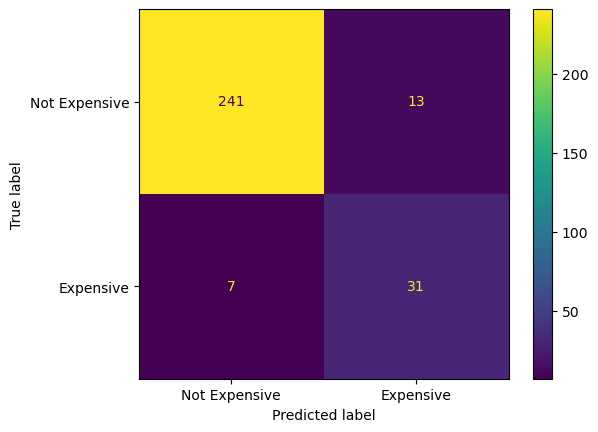

In [605]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive','Expensive']);

### **Exercise 2:** build the same pipeline using other algorithms

Go through the Plaform lesson on Model Selection () and check the performance of, at least, the following algorithms:

* Logistic Regression
* Support Vector Machine
* Random Forest

#### LogisticRegression

In [606]:
from sklearn.linear_model import LogisticRegression


In [607]:
full_logreg_pipeline_scaled = make_pipeline(preprocessor,
                                    StandardScaler(),
                                 LogisticRegression())

In [608]:
#full_logreg_pipeline_scaled = make_pipeline(preprocessor,
#                                  StandardScaler(),
#                                  LogisticRegression(solver='newton-cholesky'))

In [609]:
#full_logreg_pipeline_scaled = make_pipeline(preprocessor,
#                                  StandardScaler(),
#                                  LogisticRegression(solver='newton-cholesky'))

In [610]:
full_logreg_pipeline_scaled

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1'...
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'HeatingQC', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [611]:
import numpy as np
import warnings

warnings.filterwarnings("ignore")
# Filter out the specific warning by specifying its category
#warnings.filterwarnings("ignore", category=UserWarning, message="Scoring failed.")
#warnings.filterwarnings("ignore", category=UserWarning, message="One or more of the test scores are non-finite")



param_grid_logreg = {
    'columntransformer__num_pipe__simpleimputer__strategy':['mean'],
    #'logisticregression__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__penalty' : ['l2'],
    #'logisticregression__C' : np.logspace(-4, 4, 20),
    #'logisticregression__solver' : ['newton-cholesky','newton-cg','liblinear','sag','saga'],
    'logisticregression__solver' : ['newton-cholesky'],
    #'logisticregression__max_iter' : [100, 1000,2500, 5000]
}

search_logreg = GridSearchCV(full_logreg_pipeline_scaled,
                      param_grid_logreg,
                      cv=10,
                      verbose=True)

search_logreg.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodA...
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean'],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['newton-cholesky']},
             verbose=True)

In [612]:
search_logreg.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cholesky'}

In [613]:
scores["logreg"] = search_logreg.best_score_

scores

{'dtree': 0.9306734453286177,
 'knn': 0.9126510462717359,
 'knn_scaled': 0.9263483642793988,
 'logreg': 0.9366710875331565}

In [614]:
#logreg': 0.935798393309123

In [615]:
accuracy_score(y_test, search_logreg.predict(X_test))

0.9417808219178082

In [616]:
#0.934931506849315

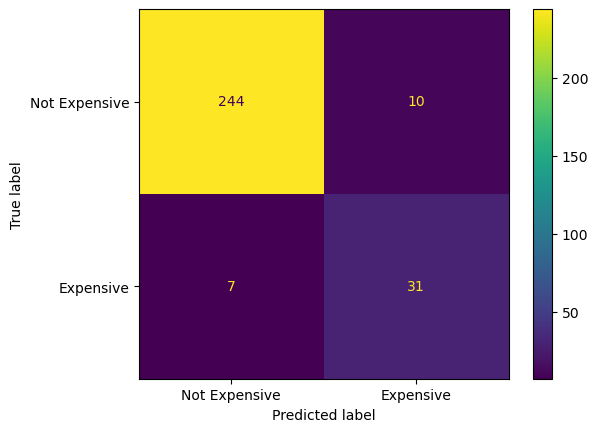

In [617]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_logreg,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive','Expensive']);

#### Support Vector Machines (SVC)

In [618]:
from sklearn.svm import SVC

In [619]:
full_svc_pipeline_scaled = make_pipeline(preprocessor,
                                    StandardScaler(),
                                 SVC())

In [620]:
full_svc_pipeline_scaled

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1'...
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'HeatingQC', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()), ('svc', SVC())])

In [621]:
import numpy as np
import warnings

warnings.filterwarnings("ignore")

param_grid_svc = {
    'columntransformer__num_pipe__simpleimputer__strategy':['mean', 'median'],
    'svc__kernel':['linear','poly','rbf','sigmoid','precomputed']
}

search_svc = GridSearchCV(full_svc_pipeline_scaled,
                      param_grid_svc,
                      cv=10,
                      verbose=1)

search_svc.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodA...
       'Exterior1st', 'MasVnrType', 'HeatingQC', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                                       ('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']},
             verbose=1)

In [622]:
search_svc.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'svc__kernel': 'sigmoid'}

In [623]:
scores["svc"] = search_svc.best_score_

scores

{'dtree': 0.9306734453286177,
 'knn': 0.9126510462717359,
 'knn_scaled': 0.9263483642793988,
 'logreg': 0.9366710875331565,
 'svc': 0.9477969348659003}

In [624]:
accuracy_score(y_test, search_svc.predict(X_test))

0.9417808219178082

#### Random Forest Classifier

In [625]:
from sklearn.ensemble import RandomForestClassifier

In [626]:
full_random_forest_pipeline_scaled = make_pipeline(preprocessor,
                                    StandardScaler(),
                                 RandomForestClassifier())

In [627]:
full_random_forest_pipeline_scaled

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1'...
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'HeatingQC', 'Electrical', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [656]:
param_grid_random_forest = {
       "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
       "randomforestclassifier__max_depth": range(14, 40, 2),
       "randomforestclassifier__min_samples_leaf": range(3, 10, 2),
       "randomforestclassifier__min_samples_split": range(2, 10, 5),
       "randomforestclassifier__criterion":["gini", "entropy"]
}

search_random_forest = GridSearchCV(full_random_forest_pipeline_scaled,
                      param_grid_random_forest,
                      cv=10,
                      verbose=1)

search_random_forest.fit(X_train, y_train)

Fitting 10 folds for each of 416 candidates, totalling 4160 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodA...
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': range(14, 40, 2),
                         'randomforestclassifier__min_samples_leaf': range(3, 10, 2),
                         'randomforestclassifier__min_samples_split': range(2, 10, 5)},
             verbose=1)

In [657]:
search_random_forest.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__min_samples_split': 2}

In [658]:
scores["random_forest"] = search_random_forest.best_score_

scores

{'dtree': 0.9306734453286177,
 'knn': 0.9126510462717359,
 'knn_scaled': 0.9263483642793988,
 'logreg': 0.9366710875331565,
 'svc': 0.9477969348659003,
 'random_forest': 0.9546345417035071}

In [659]:
accuracy_score(y_test, search_random_forest.predict(X_test))

0.9486301369863014

In [660]:
competition_test = pd.read_csv('test-housing-classification.csv')

In [661]:
competition_test.pop('Id')

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [662]:
competition_test_dropped = competition_test.drop(columns=["PoolQC", "MiscFeature",
                                                          "Fence","Condition2", 
                                                          "Alley", "Exterior2nd", 
                                                          "BsmtFinType2","SaleCondition"]) 
                                                          #"SaleType", "MasVnrType", "FireplaceQu"])

In [663]:
submission_prediction = search_random_forest.predict(competition_test_dropped)
submission_prediction = list(submission_prediction)
submission_df = pd.DataFrame()
submission_df['Id'] = Id
submission_df['Expensive'] = submission_prediction
submission_df

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,0
1457,2918,0


In [664]:
# create the csv for the competition and download it
submission_df.to_csv("classification_17.csv", index=False)

In [219]:
submission_prediction_4 = search_svc.predict(competition_test_dropped)
submission_prediction_4 = list(submission_prediction_4)
submission_df_4 = pd.DataFrame()
submission_df_4['Id'] = Id
submission_df_4['Expensive'] = submission_prediction_4
submission_df_4

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,0
1457,2918,0


In [220]:
submission_df_4.to_csv("classification_4.csv", index=False)

In [221]:
submission_prediction_3 = search_logreg.predict(competition_test_dropped)
submission_prediction_3 = list(submission_prediction_3)
submission_df_3 = pd.DataFrame()
submission_df_3['Id'] = Id
submission_df_3['Expensive'] = submission_prediction_3
submission_df_3

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,0
1457,2918,0


In [222]:
submission_df_3.to_csv("classification_5.csv", index=False)